In [1]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [2]:
fifa_df = pd.read_csv('FIFA21_official_data.csv')
fifa_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0


In [6]:
fifa_df.shape

(17108, 65)

Berdasarkan web fifa, atribute yang memengaruhi nilai seorang pemain adalah sbb:
    'Name', 'Overall', 'Best Position', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
    'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
    'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
    'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'

dan saya akan memisahkan penilaian khusus untuk GK


In [8]:
data_set = fifa_df[[
    'Name', 'Overall', 'Best Position', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
    'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
    'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
    'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'
]]
data_set

,Name,Overall,Best Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,L. Suárez,87,ST,80.0,92.0,84.0,83.0,90.0,84.0,86.0,...,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,57.0
1,K. De Bruyne,91,CAM,94.0,82.0,55.0,94.0,82.0,88.0,85.0,...,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,68.0
2,Bruno Fernandes,87,CAM,87.0,77.0,58.0,88.0,86.0,85.0,86.0,...,91.0,86.0,67.0,55.0,12.0,14.0,15.0,8.0,14.0,72.0
3,A. Griezmann,87,ST,83.0,88.0,83.0,84.0,87.0,87.0,86.0,...,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,59.0
4,M. Acuña,83,LB,87.0,66.0,57.0,81.0,68.0,87.0,88.0,...,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,19 C. Miszta,50,GK,14.0,5.0,13.0,24.0,5.0,14.0,13.0,...,11.0,29.0,11.0,13.0,48.0,51.0,56.0,40.0,56.0,NaN
17104,B. Voll,51,GK,8.0,9.0,11.0,23.0,7.0,11.0,11.0,...,7.0,24.0,12.0,10.0,52.0,55.0,52.0,42.0,57.0,5.0
17105,T. Parker,51,GK,10.0,7.0,10.0,17.0,8.0,6.0,13.0,...,13.0,30.0,10.0,11.0,50.0,49.0,50.0,53.0,55.0,8.0
17106,H. Sveijer,49,GK,10.0,7.0,11.0,19.0,7.0,10.0,13.0,...,14.0,20.0,10.0,10.0,50.0,51.0,49.0,50.0,51.0,8.0


In [9]:
data_set.isnull().sum()

Name                    0
Overall                 0
Best Position           0
Crossing                0
Finishing               0
HeadingAccuracy         0
ShortPassing            0
Volleys                39
Dribbling               0
Curve                  39
FKAccuracy              0
LongPassing             0
BallControl             0
Acceleration            0
SprintSpeed             0
Agility                39
Reactions               0
Balance                39
ShotPower               0
Jumping                39
Stamina                 0
Strength                0
LongShots               0
Aggression              0
Interceptions           3
Positioning             3
Vision                 39
Penalties               0
Composure             287
StandingTackle          0
SlidingTackle          39
GKDiving                0
GKHandling              0
GKKicking               0
GKPositioning           0
GKReflexes              0
DefensiveAwareness    942
dtype: int64

In [14]:
import pandas as pd

# Menambahkan kolom baru untuk menunjukkan apakah nilainya null atau tidak (1 = null, 0 = tidak null)
data_set['Volleys_isnull'] = data_set['Volleys'].isnull().astype(int)
data_set['Curve_isnull'] = data_set['Curve'].isnull().astype(int)
data_set['Agility_isnull'] = data_set['Agility'].isnull().astype(int)
data_set['Balance_isnull'] = data_set['Balance'].isnull().astype(int)
data_set['Jumping_isnull'] = data_set['Jumping'].isnull().astype(int)
data_set['Interceptions_isnull'] = data_set['Interceptions'].isnull().astype(int)
data_set['Positioning_isnull'] = data_set['Positioning'].isnull().astype(int)
data_set['Vision_isnull'] = data_set['Vision'].isnull().astype(int)
data_set['Composure_isnull'] = data_set['Composure'].isnull().astype(int)
data_set['SlidingTackle_isnull'] = data_set['SlidingTackle'].isnull().astype(int)
data_set['DefensiveAwareness_isnull'] = data_set['DefensiveAwareness'].isnull().astype(int)
data_set['Position'] = data_set['Best Position']
# Mengelompokkan data berdasarkan posisi dan menghitung persentase nilai null di setiap posisi
null_by_position = data_set.groupby('Best Position').sum()

# Menampilkan hasil
print(null_by_position[['Volleys_isnull', 'Curve_isnull', 'Agility_isnull', 'Balance_isnull',
                        'Jumping_isnull', 'Interceptions_isnull', 'Positioning_isnull',
                        'Vision_isnull', 'Composure_isnull', 'SlidingTackle_isnull',
                        'DefensiveAwareness_isnull']])


               Volleys_isnull  Curve_isnull  Agility_isnull  Balance_isnull  \
Best Position                                                                 
CAM                         0             0               0               0   
CB                          9             9               9               9   
CDM                         1             1               1               1   
CF                         12            12              12              12   
CM                          2             2               2               2   
GK                          3             3               3               3   
LB                          1             1               1               1   
LM                          0             0               0               0   
LW                          0             0               0               0   
LWB                         0             0               0               0   
RB                          0             0         

C:\Users\fathu\AppData\Local\Temp\ipykernel_11924\1919747763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Volleys_isnull'] = data_set['Volleys'].isnull().astype(int)
C:\Users\fathu\AppData\Local\Temp\ipykernel_11924\1919747763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Curve_isnull'] = data_set['Curve'].isnull().astype(int)
C:\Users\fathu\AppData\Local\Temp\ipykernel_11924\1919747763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

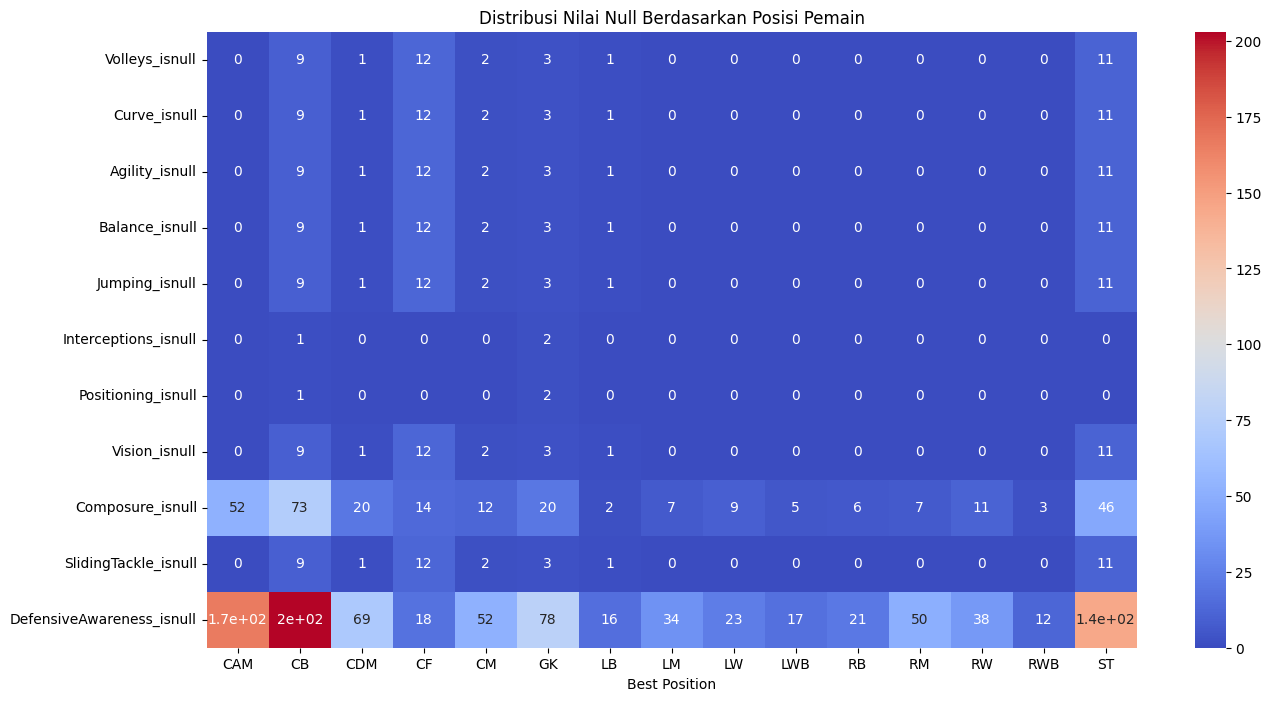

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah nilai null per posisi
plt.figure(figsize=(15, 8))
sns.heatmap(null_by_position[['Volleys_isnull', 'Curve_isnull', 'Agility_isnull', 'Balance_isnull',
                        'Jumping_isnull', 'Interceptions_isnull', 'Positioning_isnull',
                        'Vision_isnull', 'Composure_isnull', 'SlidingTackle_isnull',
                        'DefensiveAwareness_isnull']].T, cmap='coolwarm', annot=True)
plt.title('Distribusi Nilai Null Berdasarkan Posisi Pemain')
plt.show()


In [25]:
#saya rasa agar tidak terdapat kesalahan pada hasil, saya akan menghilangkan missing values
clean_data_set = data_set.drop(columns=['Volleys_isnull', 'Curve_isnull', 'Agility_isnull', 'Balance_isnull',
                        'Jumping_isnull', 'Interceptions_isnull', 'Positioning_isnull',
                        'Vision_isnull', 'Composure_isnull', 'SlidingTackle_isnull',
                        'DefensiveAwareness_isnull','Position'])
clean_data_set = clean_data_set.dropna()
df = clean_data_set.drop(columns=['Name','Best Position'])

In [26]:
display(df.head())

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,87,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,...,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,57.0
1,91,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,...,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,68.0
2,87,87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,...,91.0,86.0,67.0,55.0,12.0,14.0,15.0,8.0,14.0,72.0
3,87,83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,...,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,59.0
4,83,87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,...,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,79.0


In [23]:
# statistical measures of the dataset
df.describe()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
count,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,...,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000,16166.000000
mean,66.625634,51.098293,47.505011,53.107448,60.087901,44.353705,57.505444,48.951812,43.628356,53.831622,...,49.566745,59.458493,48.072745,45.921564,15.694792,15.531486,15.406223,15.543486,15.789806,47.014475
std,6.980005,17.901858,19.442383,16.979966,14.043426,17.611583,18.156002,18.101100,17.267938,14.913740,...,15.512970,11.860040,21.483431,21.165111,16.938611,16.217642,15.876377,16.443296,17.249595,20.152543
min,46.000000,6.000000,3.000000,5.000000,7.000000,4.000000,5.000000,4.000000,5.000000,9.000000,...,7.000000,12.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,62.000000,40.000000,32.000000,45.000000,55.000000,32.000000,52.000000,37.000000,32.000000,45.000000,...,40.000000,52.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,29.000000
50%,67.000000,55.000000,52.000000,56.000000,63.000000,46.000000,63.000000,51.000000,42.000000,57.000000,...,51.000000,60.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,52.000000
75%,71.000000,65.000000,63.000000,65.000000,69.000000,58.000000,69.000000,63.000000,57.000000,65.000000,...,61.000000,68.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,64.000000
max,93.000000,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,...,92.000000,96.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000,94.000000


In [27]:
correlation = df.corr()

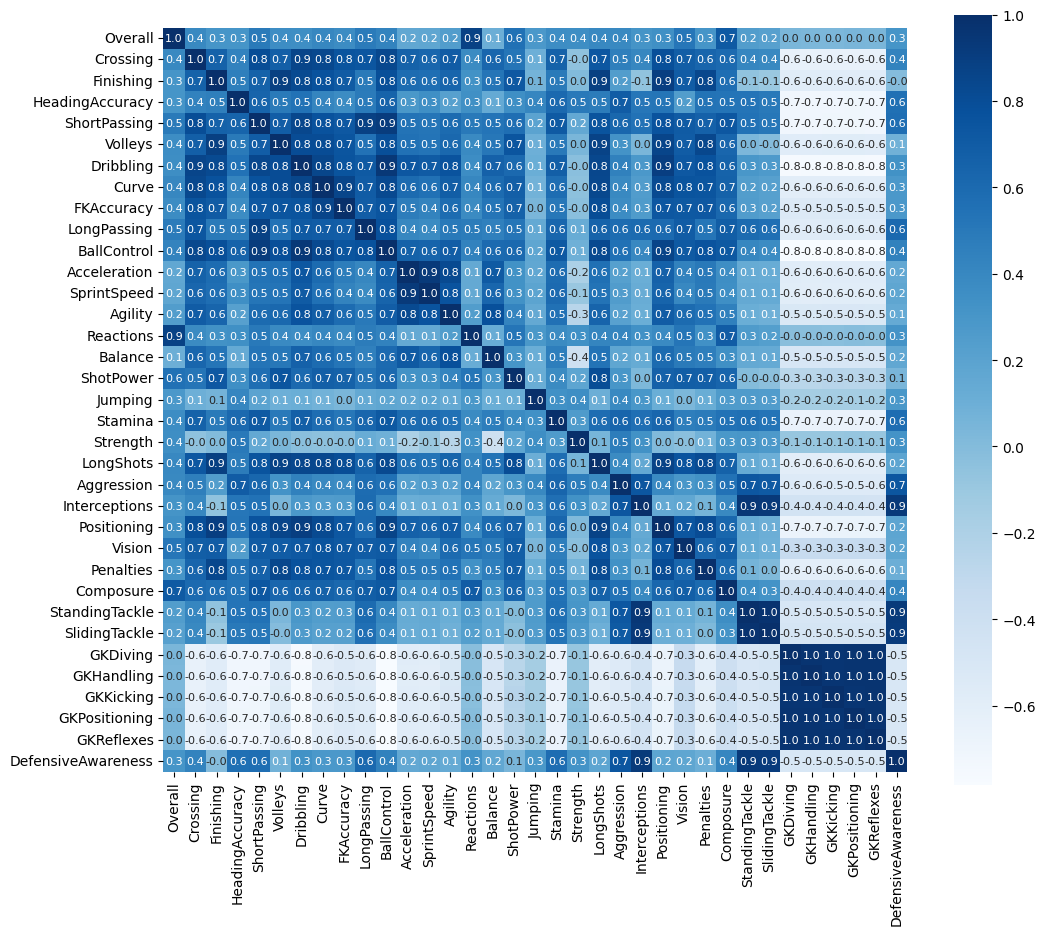

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur ukuran figura (figure)
plt.figure(figsize=(12, 10))  # Sesuaikan ukuran sesuai kebutuhan

# Buat heatmap
sns.heatmap(correlation, 
            cbar=True, 
            square=True, 
            fmt='.1f', 
            annot=True, 
            annot_kws={'size':8}, 
            cmap='Blues')

# Tampilkan plot
plt.show()

In [30]:
# separate the data and Label
X = df.drop('Overall',axis=1)
display(X)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,...,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,57.0
1,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,...,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,68.0
2,87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,88.0,...,91.0,86.0,67.0,55.0,12.0,14.0,15.0,8.0,14.0,72.0
3,83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,89.0,...,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,59.0
4,87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,87.0,...,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17100,12.0,6.0,14.0,27.0,5.0,7.0,11.0,10.0,16.0,15.0,...,15.0,37.0,12.0,10.0,54.0,54.0,47.0,54.0,56.0,6.0
17102,11.0,8.0,10.0,23.0,6.0,9.0,10.0,13.0,21.0,12.0,...,14.0,23.0,10.0,12.0,49.0,52.0,52.0,53.0,53.0,6.0
17104,8.0,9.0,11.0,23.0,7.0,11.0,11.0,11.0,17.0,14.0,...,7.0,24.0,12.0,10.0,52.0,55.0,52.0,42.0,57.0,5.0
17105,10.0,7.0,10.0,17.0,8.0,6.0,13.0,10.0,19.0,16.0,...,13.0,30.0,10.0,11.0,50.0,49.0,50.0,53.0,55.0,8.0


In [31]:
Y = df['Overall'].apply(lambda y_value: 1 if y_value>=75 else 0)
Y

0        1
1        1
2        1
3        1
4        1
        ..
17100    0
17102    0
17104    0
17105    0
17106    0
Name: Overall, Length: 16166, dtype: int64

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [33]:
print(Y.shape, Y_train.shape, Y_test.shape)

(16166,) (12932,) (3234,)


In [34]:
model = RandomForestClassifier()

In [35]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9752628324056896


In [39]:
# Misalkan model telah dilatih
Y_pred = model.predict(X_test)
f1 = f1_score(Y_test, Y_pred)
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.90
